In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


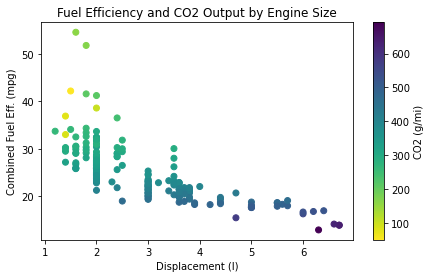

In [11]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

#plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2', cmap='viridis_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

#### POLISHING PLOTS PRACTICE

In [15]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Task: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokémon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from Pokémon Wiki Bulbapedia.)

In [16]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

In [17]:
pokemon_sub.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


C:\Users\Frances-Anthony\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


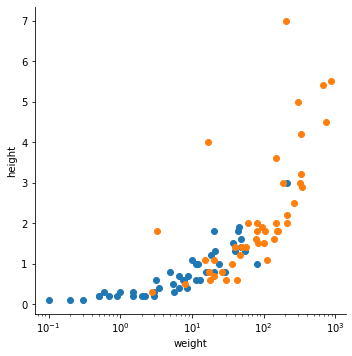

In [18]:
# MODIFY THIS CODE
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')


__SOLUTION__


- I created labels to the individual axes, including units of measurement. 
- I also added a descriptive title for the plot. 
- On the x-axis, I've changed the default tick marks to be plain numbers, using a 1-3-10 scheme. 
- Finally, I've added a legend to the plot to associate each point to a Pokemon type. To set up the custom colors, I added a 'palette' argument to the FacetGrid call, pointing to a dictionary associating each type to a color. 
- The legend was added using matplotlib, so that the Pokemon types could be capitalized.